# **EXR5 - clustering**
### Laboratory of **Computational Physics**, module B
#### University of **Padua** *AY 2021/2022* 

### Notebook 1 - data generation
#### Barone Francesco Pio

***

In [1]:
import numpy as np
from numpy import cos, sin, pi, random
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
plt.rcParams['font.size'] = 14
mycmap = ListedColormap(["blue","red","gold" ])

!mkdir DATA -p

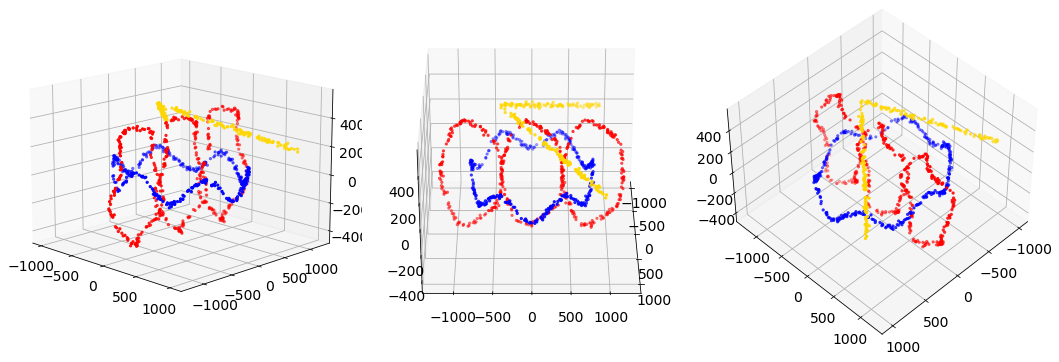

In [2]:
np.random.seed(12345)
# number of data samples
N=1000
# size of each sample
L=3
#  % of points in cluster 0 and 1
p0,p1=35,45
# radii for 3d construction
R0=800
R1=400
x,y,r,noise=np.zeros((N,L)),np.zeros(N),np.random.randint(0,100,N),np.random.randn(N,L)*10

for n in range(N):
    if r[n]<p0:
        y[n]=0
        q = random.rand()*2*pi
        x[n,:3] = (R0*cos(q), R0*sin(q), -(R0/10)*cos(6*q))
    elif r[n]<p1+p0:
        y[n]=1
        q = random.rand()*2*pi
        x[n,:3] = (-(R1/5)*sin(4*q), R1*cos(q), R1*sin(q))
        x[n,:3] = x[n,:3] + R0*np.array((0,random.randint(3) - 1, 0))
    else:
        y[n]=2
        q = random.rand()*1000.
        x[n,:3] = ((random.randint(2)-0.5)*2*q, 1.333*q-R1, 1.333*R1-0.333*q)
x = x + noise
y = y.astype(int)

fig = plt.figure(figsize=(15, 5))
for i in range(3):
    ax = fig.add_subplot(1,3,i+1,projection='3d')
    ax.scatter(x[:,0], x[:,1],x[:,2], s=5, c=y, depthshade=True, cmap=mycmap)
    ax.view_init(15+15*i, 45*(i-1))
    plt.tight_layout()
plt.draw()

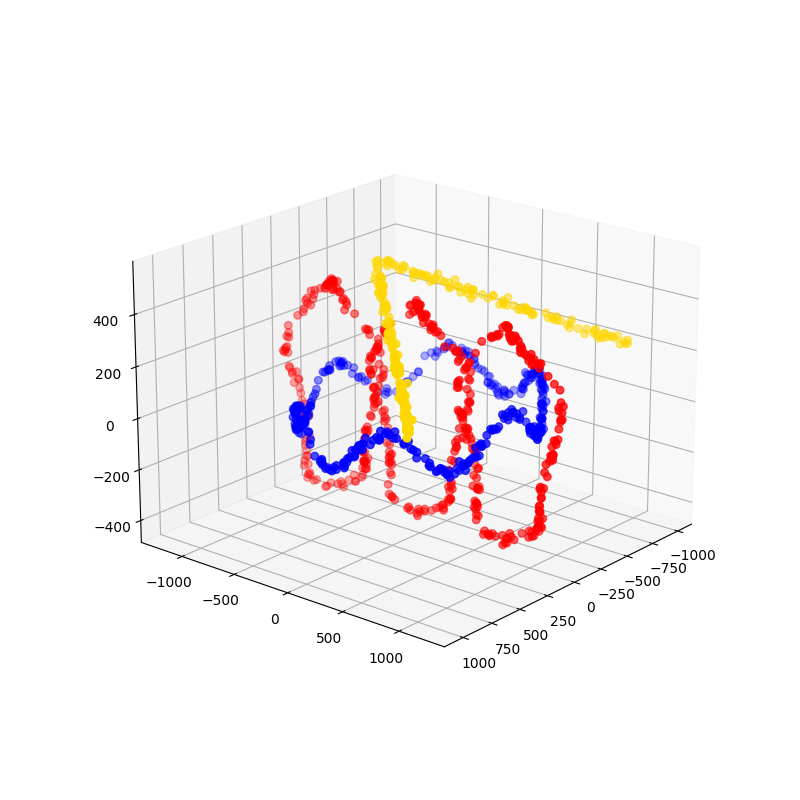

In [3]:
%matplotlib widget
# pip install ipympl

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(x[:,0], x[:,1],x[:,2], s=30, c=y, depthshade=True, cmap=mycmap)
ax.view_init(20, 40)
plt.draw()

In [4]:
np.savetxt("DATA/x_3d.dat",x,delimiter='\t')
np.savetxt("DATA/y_3d.dat",y,fmt="%d")

x0=np.copy(x)

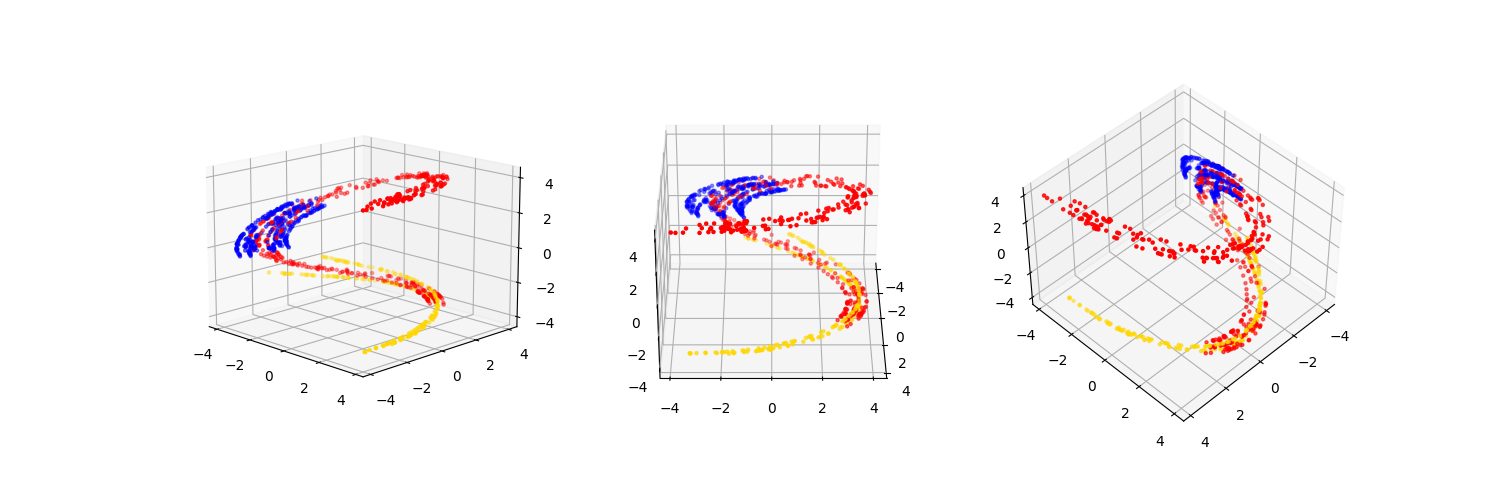

In [5]:


def deform(x,ii):
    M,m =np.max(x,axis=0),np.min(x,axis=0)
    D=M-m
    X = np.copy(x)
    X[:,ii] = (X[:,ii] - m[ii])/D[ii]

    q = pi*X[:,ii[0]]
    R = 3+X[:,ii[1]]
    X[:,ii[0]] = R*cos(q)
    X[:,ii[1]] = 2*R*sin(q)-R
    X[:,ii[2]] = 8*(X[:,ii[2]] - 0.5)
    return X

x=deform(x0,[2,0,1])
x=deform(x,[0,1,2])

fig = plt.figure(figsize=(15, 5))
for i in range(3):
    ax = fig.add_subplot(1,3,i+1,projection='3d')
    ax.scatter(x[:,0], x[:,1],x[:,2], s=5, c=y, depthshade=True, cmap=mycmap)
    ax.view_init(15+15*i, 45*(i-1))
plt.draw()

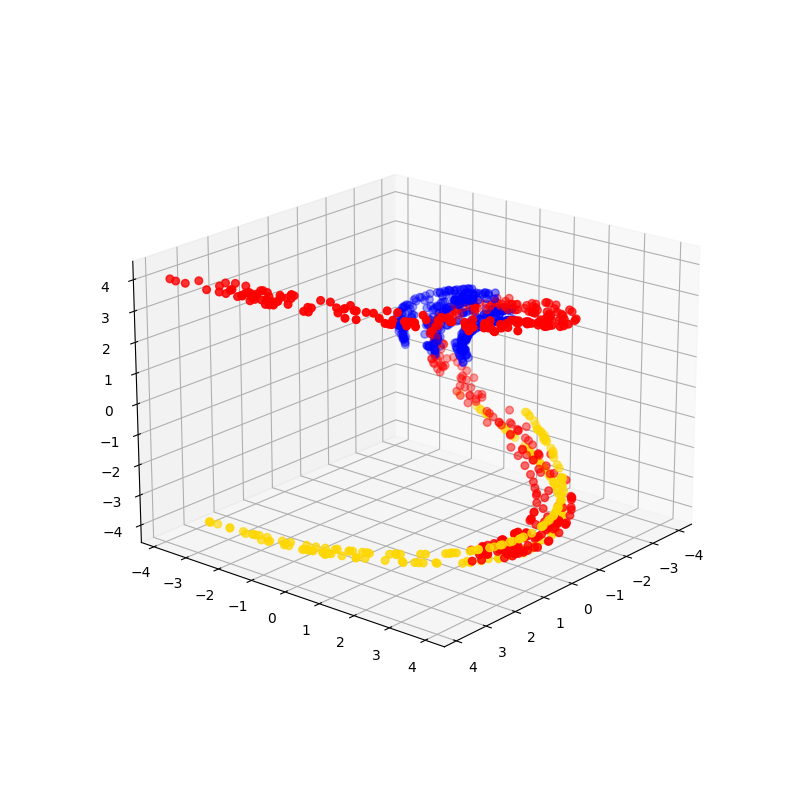

In [6]:

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(x[:,0], x[:,1],x[:,2], s=30, c=y, depthshade=True, cmap=mycmap)
ax.view_init(20, 40)
plt.draw()

In [7]:
np.savetxt("DATA/x_def_3d.dat",x,delimiter='\t')
np.savetxt("DATA/y_def_3d.dat",y,fmt="%d")

End of file.